# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
    Q(w) = 2X^T(Xw - y)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

In [1]:
%pylab inline

import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

import warnings
warnings.simplefilter("ignore")

Populating the interactive namespace from numpy and matplotlib


### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [4]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [5]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [6]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:
https://contest.yandex.ru/contest/41257/run-report/73511462/

* **StochasticDescent**:
https://contest.yandex.ru/contest/41257/run-report/74138763/

* **MomentumDescent**:
https://contest.yandex.ru/contest/41257/run-report/73511935/

* **Adam**:
https://contest.yandex.ru/contest/41257/run-report/73581096/

* **LinearRegression**:
https://contest.yandex.ru/contest/41257/run-report/74006458/

* **Ник**: sesquiipedalian84

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [8]:
data = pd.read_csv('autos.csv')

In [9]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177.0,1500.0
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93.0,3600.0
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246.0,650.0
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140.0,2200.0
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136.0,2000.0


In [10]:
data = data.dropna()

**Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.**

Очевидно, что наша целевая переменна - **price**

Text(0, 0.5, 'Кол-во машин с одинаковой стоимостью')

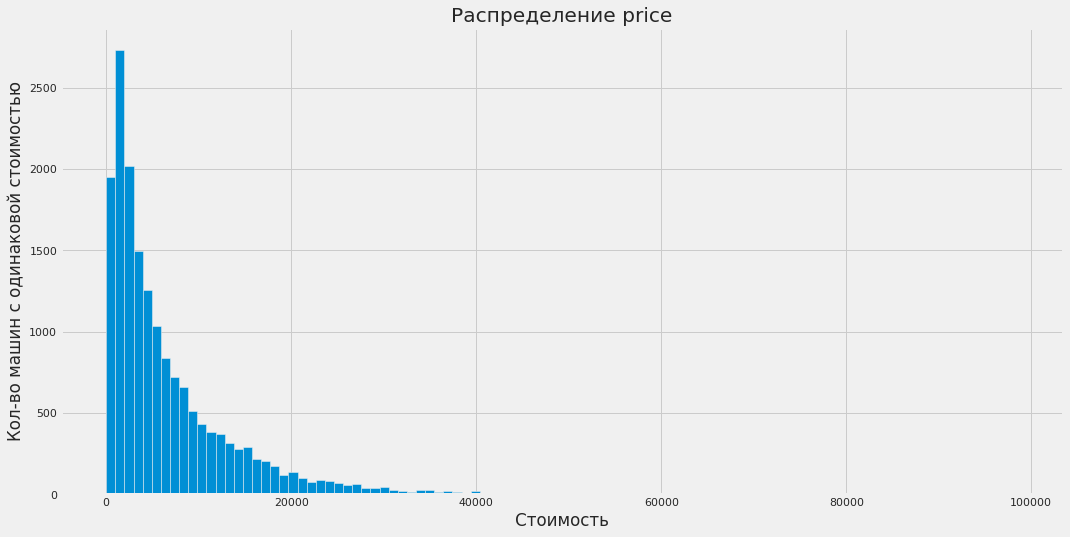

In [11]:
plt.style.use(['fivethirtyeight'])
plt.rcParams['figure.figsize']=(16, 8)

plt.hist(data['price'], bins = 100)

plt.title('Распределение price');
plt.xlabel('Стоимость')
plt.ylabel('Кол-во машин с одинаковой стоимостью')

Видим, что даже при bins = 100 наблюдаются весомые пропасти между каждым столбцом. Попробуем заменить на логарифм.

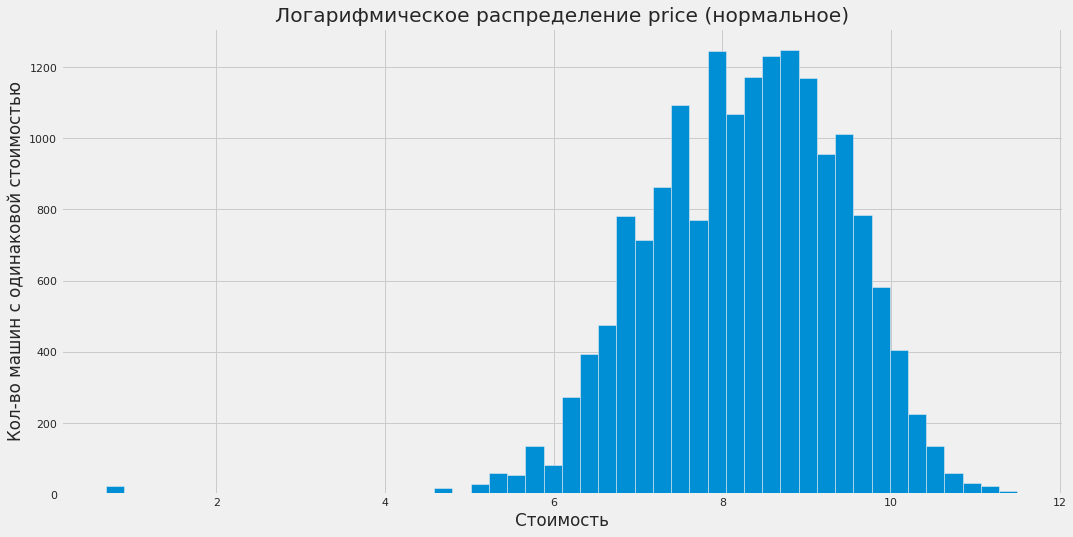

In [12]:
data['log_price'] = np.log1p(data['price'].values)
plt.hist(data['log_price'].values, bins=50)

plt.xlabel('Стоимость')
plt.ylabel('Кол-во машин с одинаковой стоимостью')
plt.title('Логарифмическое распределение price (нормальное)')

plt.show()

**Всё таки надо проверить разницу наглядно.**

In [13]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price,log_price
count,17130.000000,17130.000000,17130.000000,17130.000000,17130.000000
mean,131.683363,123791.593695,144.351839,6917.767250,8.274723
std,60.343006,39865.817900,72.931699,8044.437355,1.149787
min,51.000000,5000.000000,1.000000,1.000000,0.693147
25%,90.000000,100000.000000,91.000000,1800.000000,7.496097
50%,120.000000,150000.000000,140.000000,4200.000000,8.343078
75%,160.000000,150000.000000,192.000000,8999.000000,9.104980
max,587.000000,150000.000000,598.000000,98500.000000,11.497822


**Ай-ай-ай. 99999 против 8999. Где-то явно завалялись итальянские спорткары.**

https://stackoverflow.com/questions/58138029/pandas-does-quantile-function-need-sorted-data-to-calculate-percentiles

Text(0.5, 1.0, 'Логарифмическое распределение price (нормальное)')

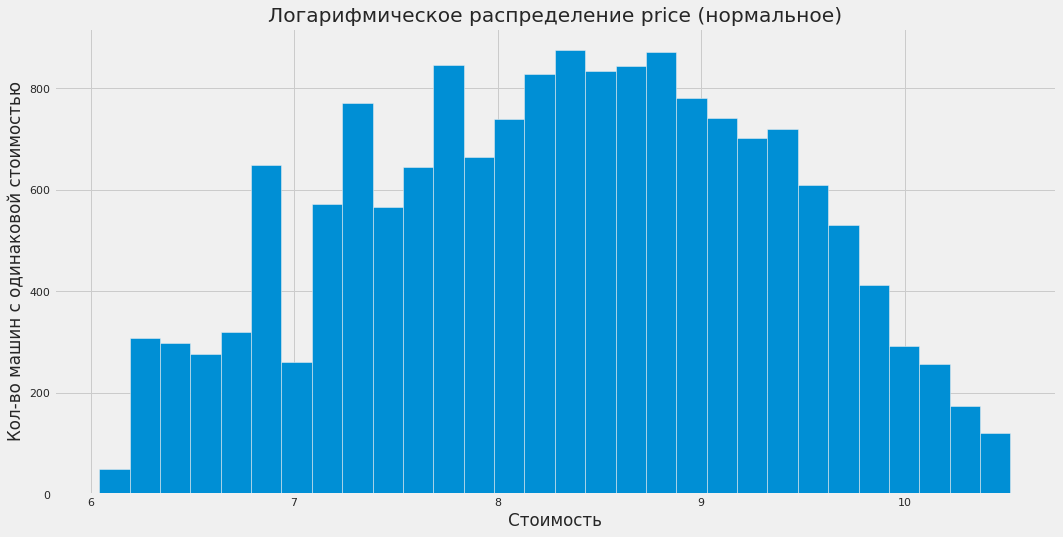

In [14]:
data_prom = data.drop(data[data['price'] > data['price'].quantile(0.99)].index)
data_prom['log_price'] = np.log1p(data_prom['price'])
data_prom = data_prom.drop(data_prom.query('log_price < 6').index)

plt.hist(data_prom['log_price'], bins = 30)
plt.xlabel('Стоимость')
plt.ylabel('Кол-во машин с одинаковой стоимостью')
plt.title('Логарифмическое распределение price (нормальное)')

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

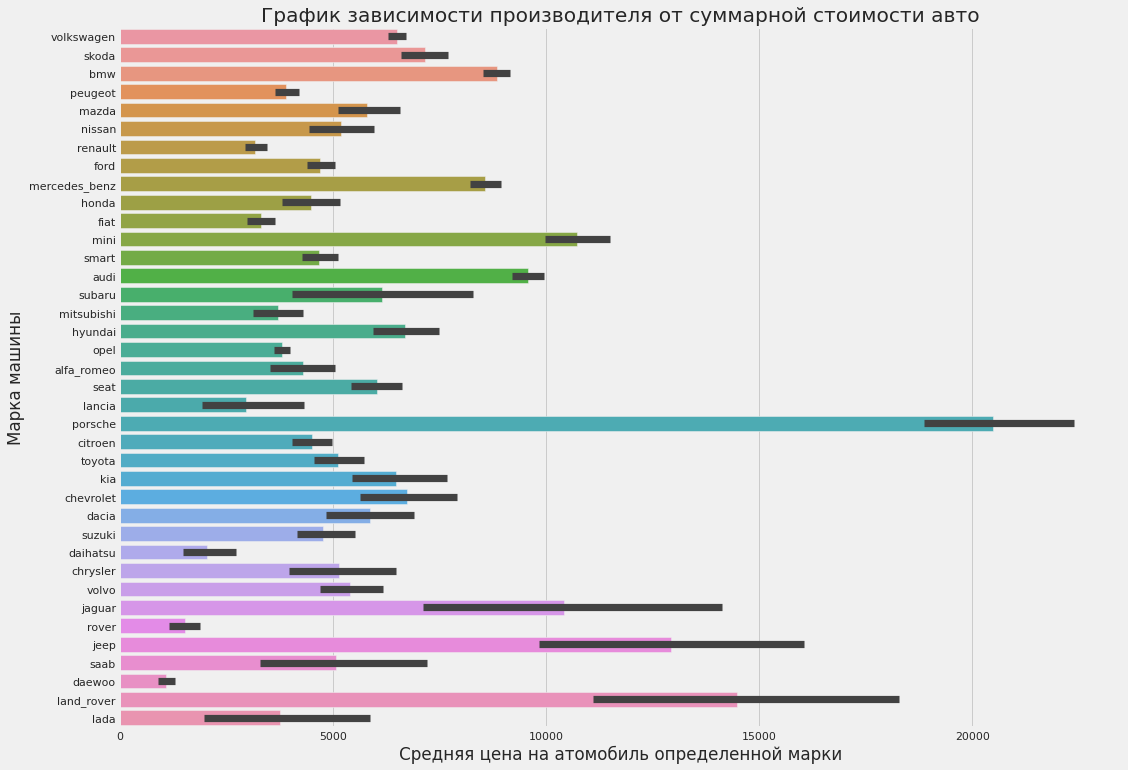

In [15]:
plt.rcParams['figure.figsize']=(16, 12)
sns.barplot(x = data_prom['price'], y = data_prom['brand'])

plt.ylabel('Марка машины')
plt.xlabel('Средняя цена на атомобиль определенной марки')
plt.title('График зависимости производителя от суммарной стоимости авто')

plt.show()

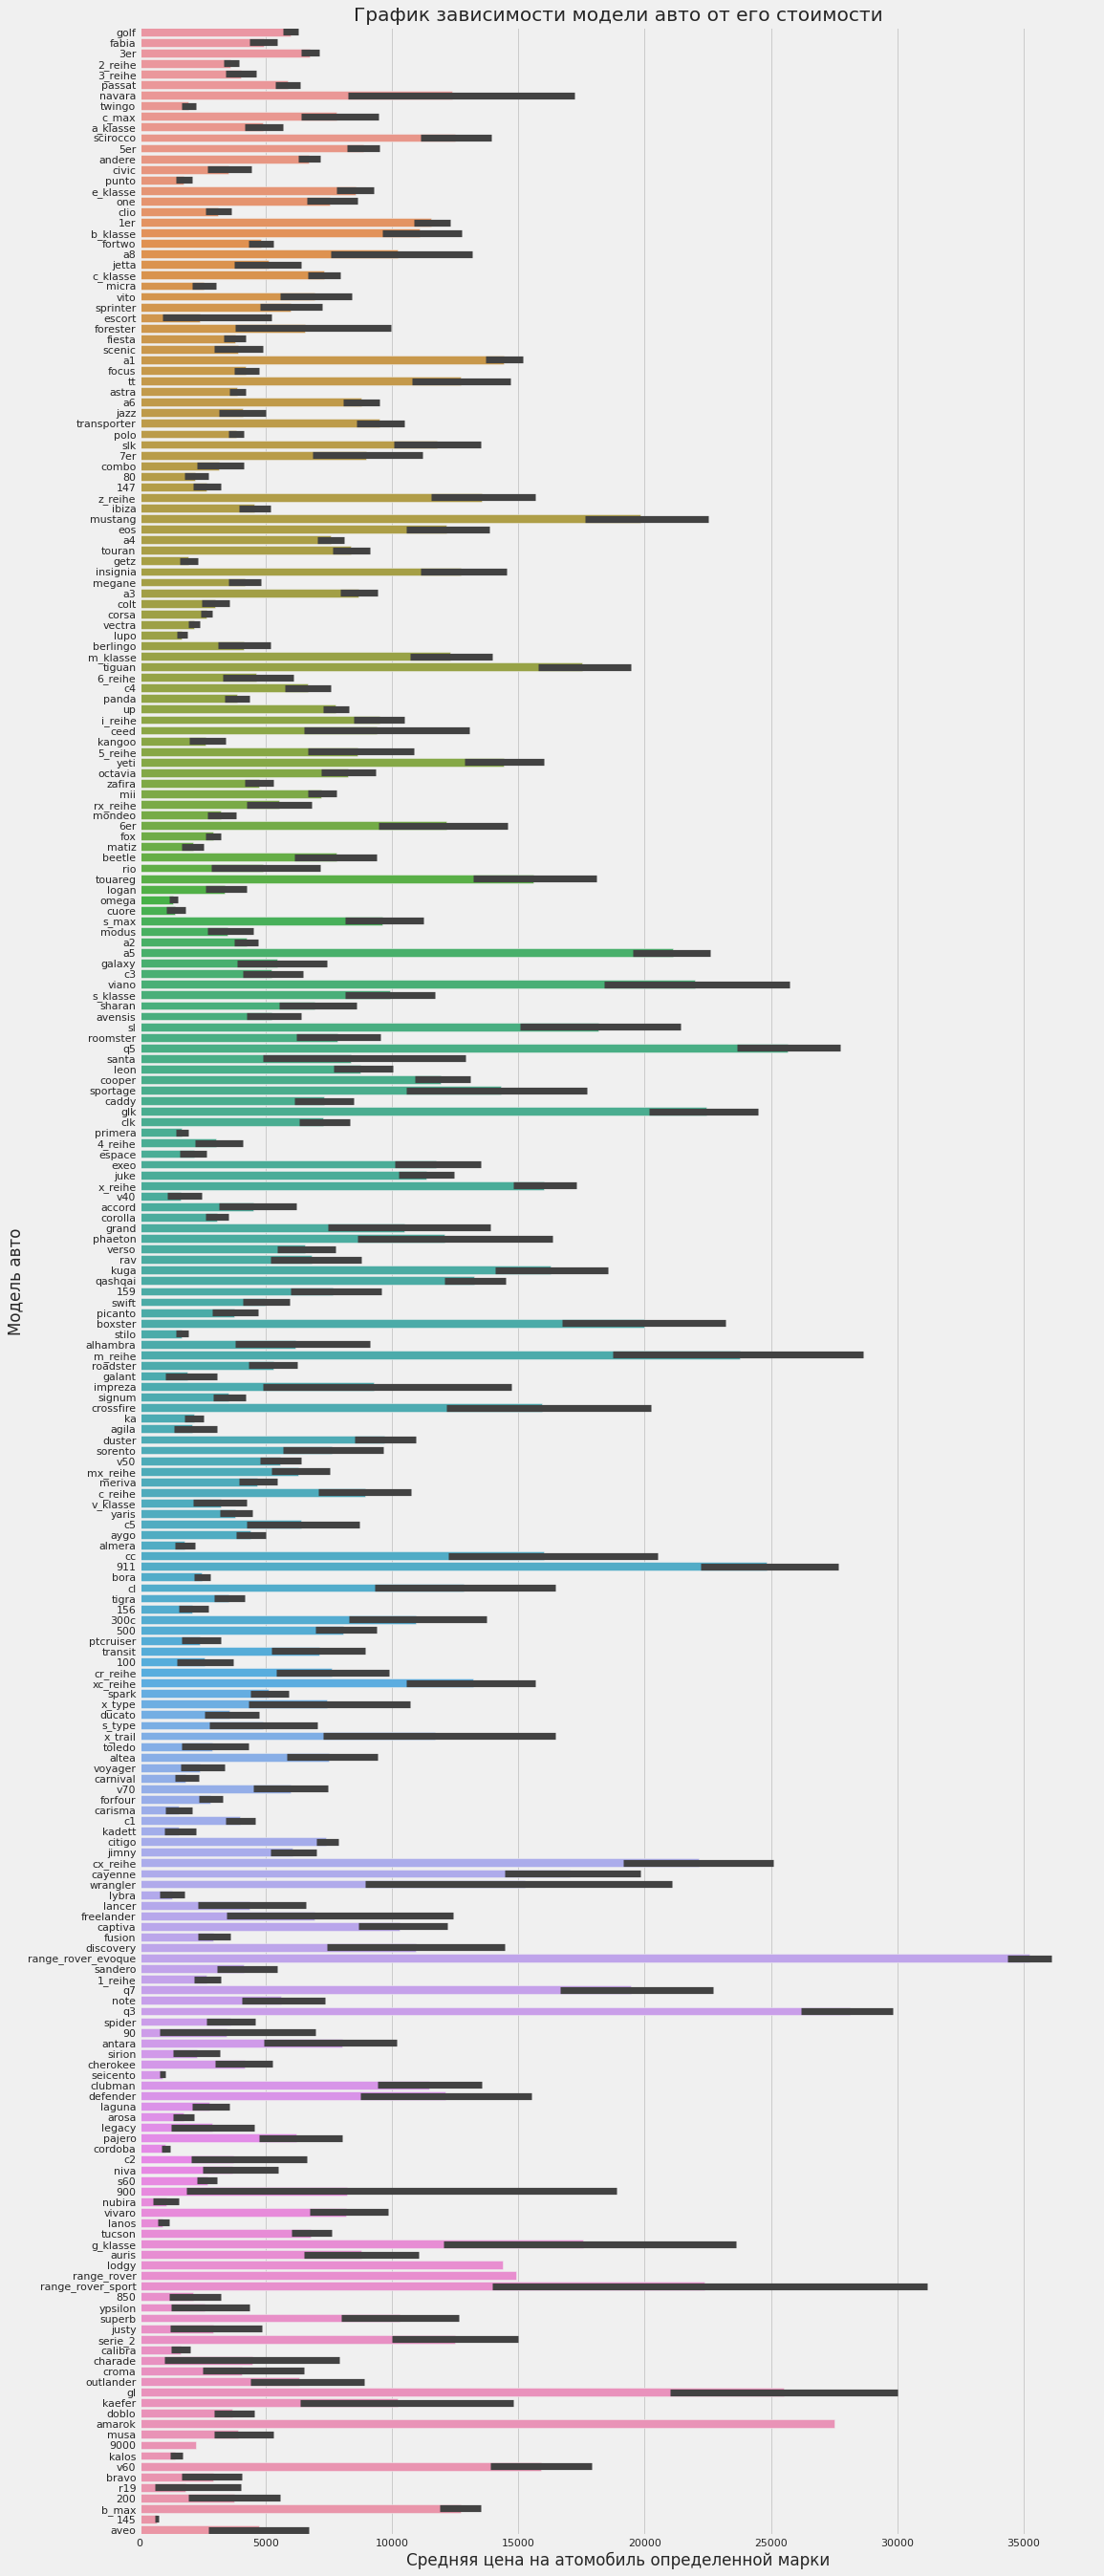

In [16]:
plt.rcParams['figure.figsize']=(16, 45)
sns.barplot(x = data_prom['price'], y = data_prom['model'])

plt.ylabel('Модель авто')
plt.xlabel('Средняя цена на атомобиль определенной марки')
plt.title('График зависимости модели авто от его стоимости')

plt.show()

*К слову, Porsche 911 - моя любимая модель авто среди всех!*:

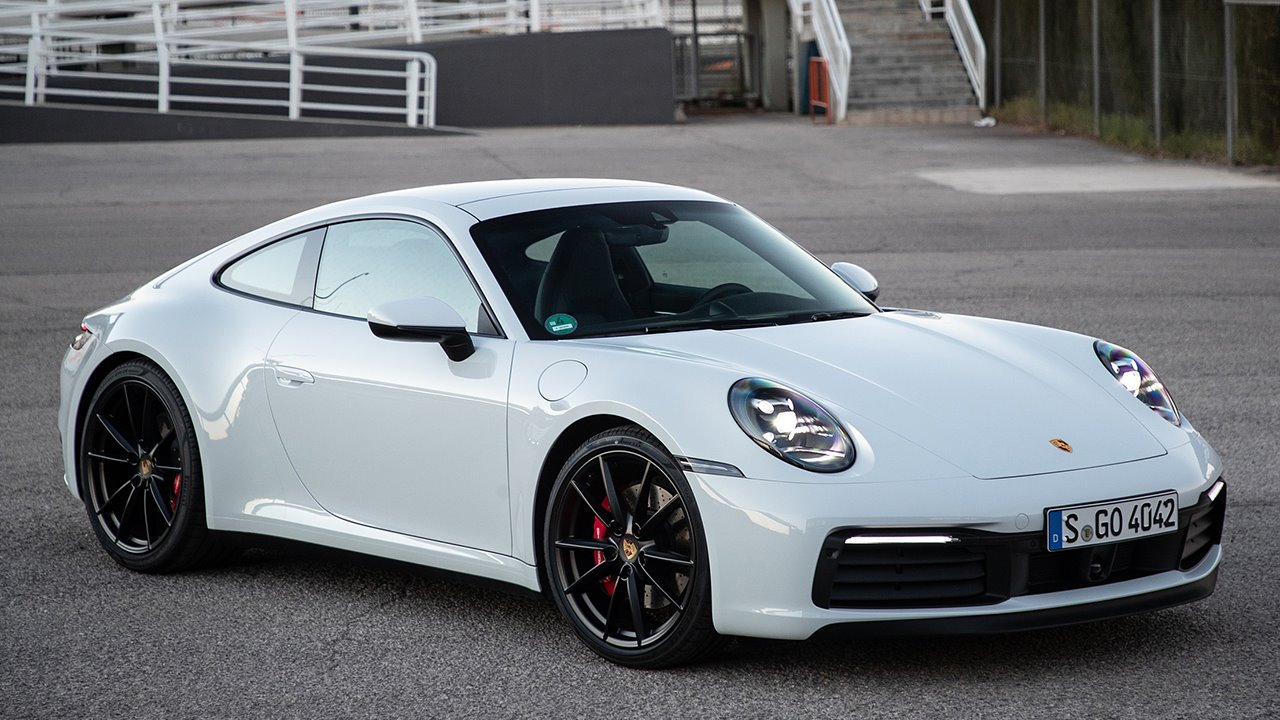

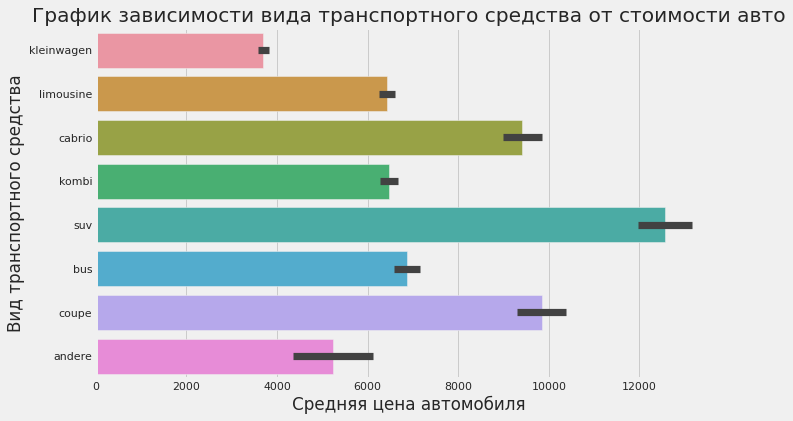

In [17]:
plt.rcParams['figure.figsize']=(10, 6)
sns.barplot(x = data_prom['price'], y = data_prom['vehicleType'])

plt.ylabel('Вид транспортного средства')
plt.xlabel('Средняя цена автомобиля')
plt.title('График зависимости вида транспортного средства от стоимости авто')

plt.show()

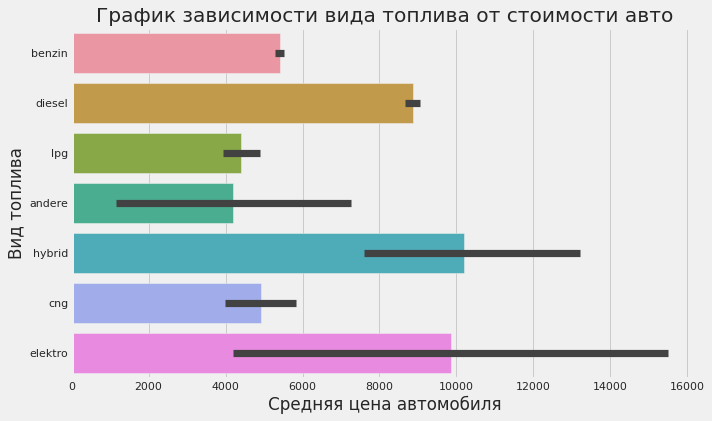

In [18]:
plt.rcParams['figure.figsize']=(10, 6)
sns.barplot(x = data_prom['price'], y = data_prom['fuelType'])

plt.ylabel('Вид топлива')
plt.xlabel('Средняя цена автомобиля')
plt.title('График зависимости вида топлива от стоимости авто')

plt.show()

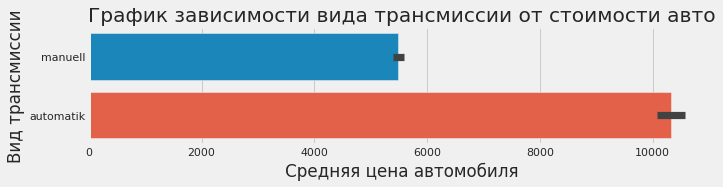

In [19]:
plt.rcParams['figure.figsize']=(10, 2)
sns.barplot(x = data_prom['price'], y = data_prom['gearbox'])

plt.ylabel('Вид трансмиссии')
plt.xlabel('Средняя цена автомобиля')
plt.title('График зависимости вида трансмиссии от стоимости авто')

plt.show()

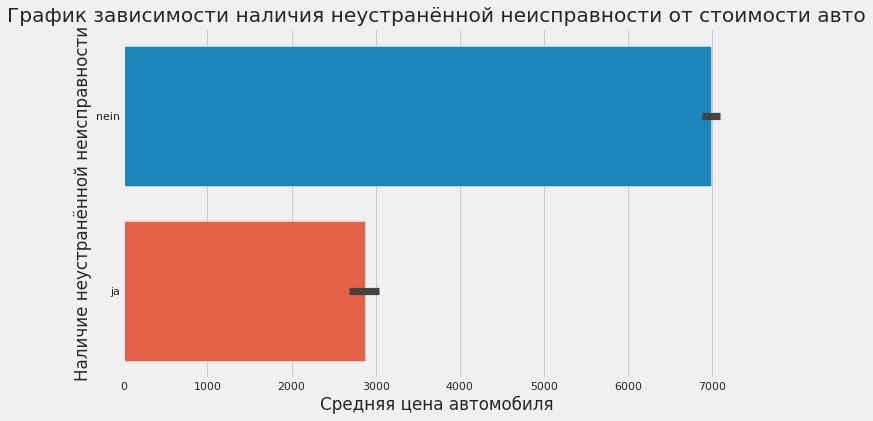

In [20]:
plt.rcParams['figure.figsize']=(10, 6)
sns.barplot(x = data_prom['price'], y = data_prom['notRepairedDamage'])

plt.ylabel('Наличие неустранённой неисправности')
plt.xlabel('Средняя цена автомобиля')
plt.title('График зависимости наличия неустранённой неисправности от стоимости авто')

plt.show()

Что-то barplot не рисует график зависимости стоимости от мощности авто... :(
Пробуем что-нибудь новенькое

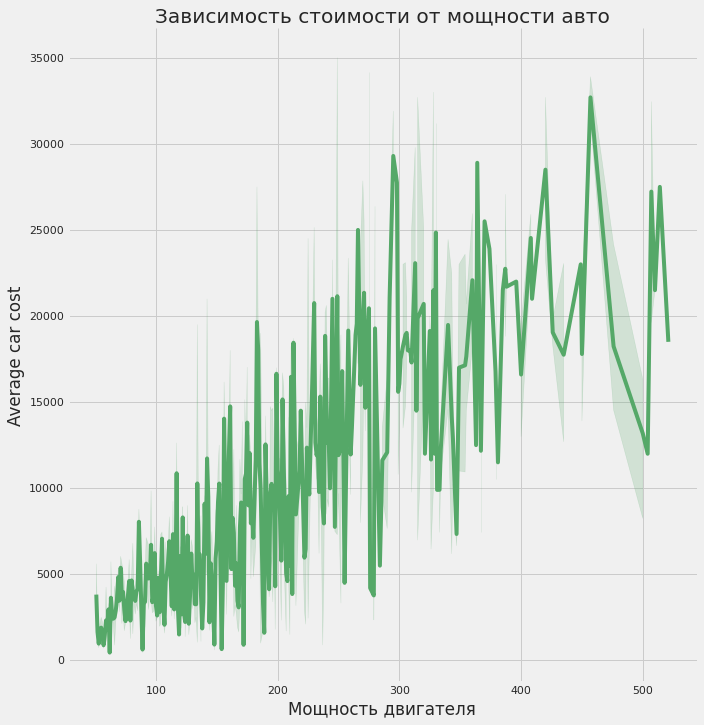

In [21]:
plt.rcParams['figure.figsize']=(25, 10)

sns.relplot(x = data_prom['powerPS'],
            y = data_prom['price'],
            height=10,
            kind='line',
            color="g",)

plt.title('Зависимость стоимости от мощности авто')
plt.ylabel('Average car cost')
plt.xlabel('Мощность двигателя')

plt.show()

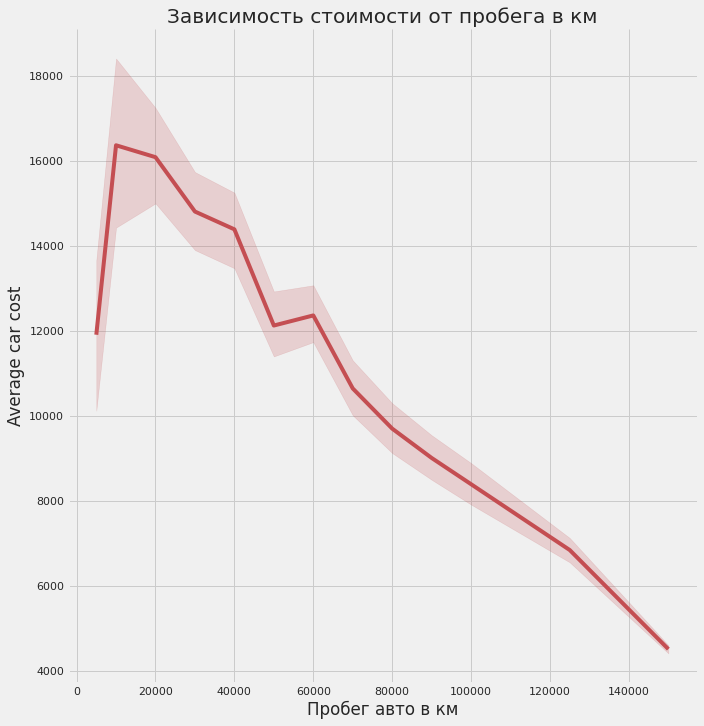

In [22]:
plt.rcParams['figure.figsize']=(25, 10)

sns.relplot(x = data_prom['kilometer'],
            y = data_prom['price'],
            height=10,
            kind='line',
            color="r",)

plt.title('Зависимость стоимости от пробега в км')
plt.ylabel('Average car cost')
plt.xlabel('Пробег авто в км')

plt.show()

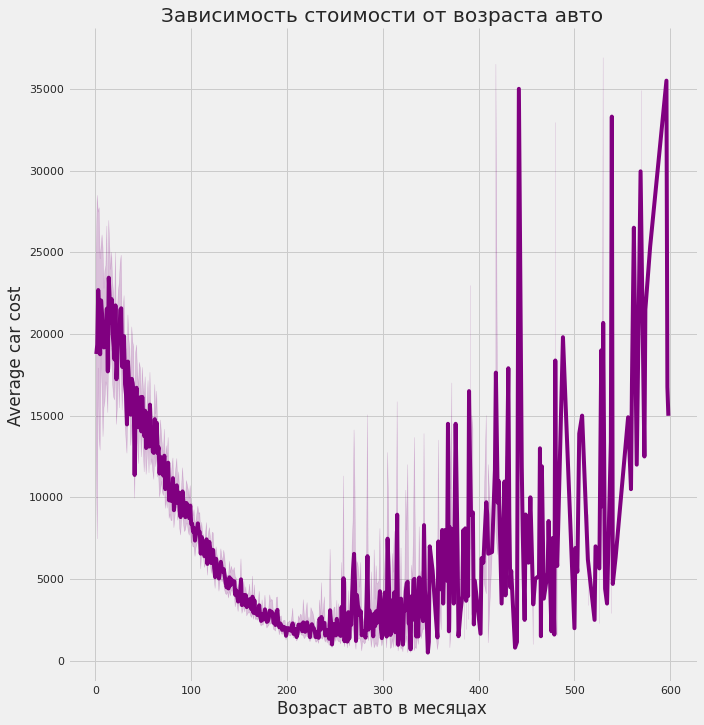

In [23]:
plt.rcParams['figure.figsize']=(25, 10)

sns.relplot(x = data_prom['autoAgeMonths'],
            y = data_prom['price'],
            height=10,
            kind='line',
            color="purple",)

plt.title('Зависимость стоимости от возраста авто')
plt.ylabel('Average car cost')
plt.xlabel('Возраст авто в месяцах')

plt.show()

**"Девушки - как вино, чем старше - тем лучше"**

In [24]:
data_prom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16547 entries, 0 to 17129
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              16547 non-null  object 
 1   model              16547 non-null  object 
 2   vehicleType        16547 non-null  object 
 3   gearbox            16547 non-null  object 
 4   fuelType           16547 non-null  object 
 5   notRepairedDamage  16547 non-null  object 
 6   powerPS            16547 non-null  int64  
 7   kilometer          16547 non-null  int64  
 8   autoAgeMonths      16547 non-null  float64
 9   price              16547 non-null  float64
 10  log_price          16547 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 2.0+ MB


Очевидно, что в численные признаки будем брать сравнимые признаки:

*   Мощность
*   Возраст
*   Пробег
*   Стоимость


In [25]:
data = data.drop(columns = 'price')

In [26]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

data_prom = data_prom.drop('log_price', axis =1)
# YOUR CODE (EDA):

In [27]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size = 0.1,random_state = 42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [30]:
from sklearn.metrics import r2_score
import itertools
from tqdm import tqdm

In [31]:
from sklearn.metrics import r2_score

In [32]:
demension_compare = X_valid.shape[1]

dict_of_dicts = {
    'stochastic' : [], 
    'momentum' : [], 
    'adam' : [],
    'full' : [],
}

for name in ['momentum', 'adam','full', 'stochastic']:
    for lambda_ in np.logspace(-2, 5, 20):
        config = {
            'descent_name': name,
            'kwargs': {
                'dimension': demension_compare,
                'lambda_': lambda_
            }
        }

        regression = LinearRegression(descent_config=config)
        regression = regression.fit(X_valid, y_valid.values)
        valid_loss = regression.loss_history

        dict_of_dicts[name].append({
            'lambda_' : lambda_,
            'loss' : valid_loss[-1],
            'steps' : len(valid_loss),
            'loss_history' : valid_loss,
        })
lambdas = {}

dict_for_loss_history = {}

for name in ['momentum', 'adam', 'full', 'stochastic']:
    kek = sorted(dict_of_dicts[name], key=lambda x: x['loss'])
    config = {
            'descent_name': name,
            'kwargs': {
                'dimension': demension_compare,
                'lambda_': kek[0]['lambda_'],
            }
        }
    regression = LinearRegression(descent_config=config)
    regression = regression.fit(X_train, y_train.values)
    train_loss = regression.loss_history
    predicted_y = regression.predict(X_test)
    lambdas[name] = kek[0]['lambda_']
    dict_for_loss_history[name] = train_loss
    print(train_loss[-1], ' ', r2_score(predicted_y, y_test.values))



0.37384533460479563   0.5703304462128653
0.35409817138748967   0.6031326106955369
0.4367059372162165   0.535871774118128
0.45021408185113626   0.5342730466348664


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [33]:
loss_histiries = {}
for name in ['momentum', 'adam','full', 'stochastic']:
    config = {
    'descent_name': name,
    'kwargs': {
        'dimension': demension_compare,
        'lambda_': lambdas[name]
    }
    }
  

    regression = LinearRegression(
        descent_config=config)
    regression = regression.fit(X_train,y_train.values)
    loss_histiries[name]= regression.loss_history

In [34]:
import plotly.graph_objects as go

In [35]:
conv_speed = []
for name in ['momentum', 'adam','full', 'stochastic']:
    conv_speed.append(go.Scatter(x=np.arange(len(dict_for_loss_history[name]) + 1),
               y=dict_for_loss_history[name], name=name))

fig = go.Figure(data=conv_speed)

fig.update_layout(title='Convergence speed',
                 xaxis=dict(title="loss"),
                yaxis=dict(title="steps before convergence")
)
fig.update_layout(
    autosize=True,
    width=700,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=4
    ),
    paper_bgcolor='LightSteelBlue',
)
fig.show()

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [36]:
batch_sizes = np.arange(5, 500, 10)

demension_compare = X_valid.shape[1]

dict_of_dicts = {
    'stochastic' : [], 
    'momentum' : [], 
    'adam' : [],
    'full' : [],
}

dict_2 = {
    'stochastic' : [], 
}

for batch_size in batch_sizes:
    config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': demension_compare,
            'batch_size': batch_size,
            'lambda_': lambdas['stochastic']

        }
    }

    regression = LinearRegression(descent_config=config)
    regression = regression.fit(X_valid, y_valid.values)
    valid_loss = regression.loss_history

    dict_2['stochastic'].append({
        'batch_size' : batch_size,
        'loss' : valid_loss[-1],
        'steps' : len(valid_loss)
    })

kek = sorted(dict_2['stochastic'], key=lambda x: x['loss'])
config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': demension_compare,
            'batch_size': kek[0]['batch_size'],
            'lambda_': lambdas['stochastic']
        }
    }
regression = LinearRegression(descent_config=config)
regression = regression.fit(X_train, y_train.values)
train_loss = regression.loss_history
predicted_y = regression.predict(X_test)
print(train_loss[-1], ' ', r2_score(predicted_y, y_test.values))



0.44270084443371727   0.47445885101011054


`### ваше решение тут ###`

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:
https://contest.yandex.ru/contest/41257/run-report/74161904/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [37]:
batch_sizes = np.arange(5, 500, 10)

demension_compare = X_valid.shape[1]

dict_3 = {
    'stochastic' : [], 
    'momentum' : [], 
    'adam' : [],
    'full' : [],
}

for name in ['momentum', 'stochastic', 'adam', 'full']:
     for lambda_ in np.logspace(-2, 5, 20):
          for mu in np.logspace(-2, 5, 20):
              config = {
                'descent_name': 'stochastic',
                'regularized': True,
                'kwargs': {
                    'dimension': demension_compare,
                    'mu': mu,
                    'lambda_': lambda_,
                  }
              }
              regression = LinearRegression(descent_config=config)
              regression = regression.fit(X_valid, y_valid.values)
              valid_loss = regression.loss_history

              dict_3[name].append({
                  'batch_size' : batch_size,
                  'loss' : valid_loss[-1],
                  'steps' : len(valid_loss),
                  'lambda_' : lambda_,
                  'mu' : mu,
              })
lambdas = {}
dict_for_loss_history = {}

for name in ['momentum', 'stochastic', 'adam', 'full']:
    kek = sorted(dict_3[name], key=lambda x: x['loss'])
    config = {
            'descent_name': name,
            'regularized': True,
            'kwargs': {
                'dimension': demension_compare,
                'lambda_': kek[0]['lambda_'],
                'mu': kek[0]['mu']
            }
        }
    regression = LinearRegression(descent_config=config)
    regression = regression.fit(X_train, y_train.values)
    train_loss = regression.loss_history
    predicted_y = regression.predict(X_test)
    lambdas[name] = kek[0]['lambda_']
    dict_for_loss_history[name] = train_loss
    print(train_loss[-1], ' ', r2_score(predicted_y, y_test.values))



0.44992830972911146   0.3563000240131047
0.8917679682069555   0.03252787600796281
2.6605828688886417   -2.0507628279359573
0.8612723794536314   -0.018475743351093366


`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [38]:
from tensorflow.python.keras import backend as K
from tensorflow.python.framework import constant_op
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import math_ops

def huber(y_true, y_pred, delta=1.345):
  delta = constant_op.constant(delta, dtype=y_pred.dtype)
  half = constant_op.constant(0.5, dtype=y_pred.dtype)
  abs_error = math_ops.abs(math_ops.subtract(y_pred, y_true))
  squared_loss = half * math_ops.squared_difference(y_pred, y_true)
  absolute_loss = delta * abs_error - half * math_ops.square(delta)
  return K.mean(array_ops.where_v2(abs_error < delta, squared_loss, absolute_loss), axis=-1)

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

https://disk.yandex.ru/d/JWNGug8uwZo9Ig

Приятного просмотра! Всем понравилось!

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [39]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [40]:
# YOUR CODE: